In [199]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter, StrMethodFormatter

Create a dataset indicating which of the four default tests were passed by which code:

In [2]:
data = pd.read_csv("processed_solutions/m0_data.csv")
tests = pd.read_csv("processed_solutions/passing_test.csv")

In [191]:
test_results = data.merge(tests, how="left", on=["name", "source", "style", "version"])
test_results["num_tests_passed"] = test_results[["test_1", "test_2", "hidden_test_1", "hidden_test_2"]].sum(axis=1)
test_results["%_tests_passed"] = test_results["num_tests_passed"]/4*100
test_results["version"] = test_results["version"].fillna(test_results["source"])

### Differences in passing tests, by different sources/model versions:

In [211]:
mean_num_tests_passed = test_results.groupby("version").agg({"num_tests_passed":"mean", "%_tests_passed":"mean", "source":"min"}).reset_index().sort_values("%_tests_passed")

In [212]:
test_results.groupby("version").mean()

,test_1,test_2,hidden_test_1,hidden_test_2,num_tests_passed,%_tests_passed
version,,,,,,
balanced,0.000000,0.000000,0.571429,0.571429,1.142857,28.571429
bard,0.000000,0.000000,0.058824,0.000000,0.058824,1.470588
concise,0.222222,0.000000,0.555556,0.333333,1.111111,27.777778
creative,0.166667,0.000000,0.500000,0.250000,0.916667,22.916667
gpt3.5,0.052632,0.000000,0.000000,0.210526,0.263158,6.578947
gpt4,0.470588,0.058824,0.058824,0.470588,1.058824,26.470588
student,0.980769,0.980769,0.980769,0.980769,3.923077,98.076923


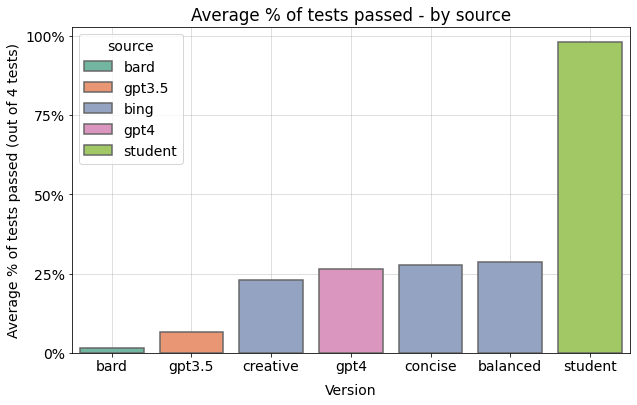

In [213]:
plt.rcParams.update({"font.size": 14})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=mean_num_tests_passed, x="version", y="%_tests_passed", hue="source", 
            dodge=False, zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Version", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by source");

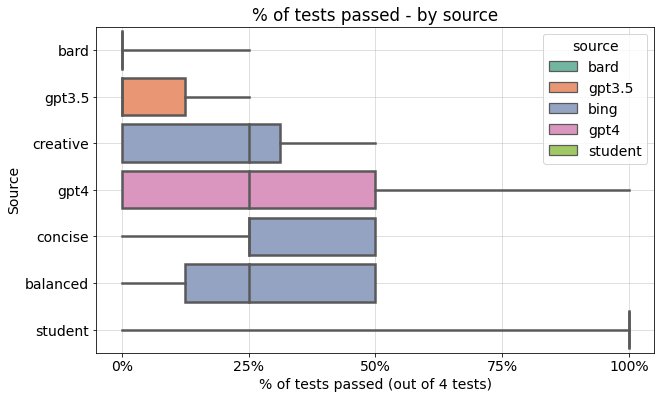

In [214]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=test_results, x="%_tests_passed", y="version", hue="source", 
            dodge=False, whis=[0, 100], capprops={"alpha":0}, linewidth=2.5,
            order=["bard", "gpt3.5", "creative", "gpt4", "concise", "balanced", "student"],
            hue_order = ["bard", "gpt3.5", "bing", "gpt4", "student"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.xaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Source")
ax.set_title("% of tests passed - by source");

### Differences in passing tests, by different styling prompts:

In [215]:
tests_passed_style = test_results.groupby("style").mean().reset_index().sort_values("%_tests_passed")

In [216]:
test_results.groupby("style").mean()

,test_1,test_2,hidden_test_1,hidden_test_2,num_tests_passed,%_tests_passed
style,,,,,,
cc,0.133333,0.000000,0.133333,0.200000,0.466667,11.666667
plain,0.234043,0.021277,0.148936,0.297872,0.702128,17.553191
styled,0.000000,0.000000,0.421053,0.263158,0.684211,17.105263


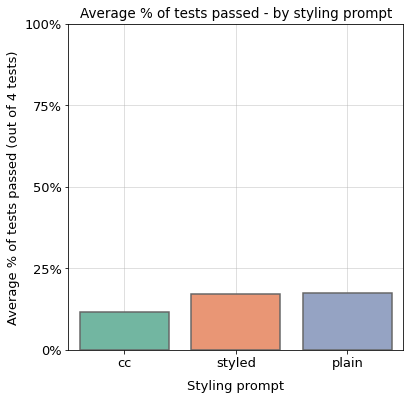

In [217]:
plt.rcParams.update({"font.size": 13})
sns.set_palette('Set2')
fig, ax = plt.subplots(figsize=(6, 6))
sns.barplot(data=tests_passed_style, x="style", y="%_tests_passed", 
            linewidth=1.5, edgecolor="0.4", zorder=2, ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Styling prompt", labelpad=10)
ax.grid(alpha=0.5, zorder=-2)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by styling prompt", fontsize=13.5);

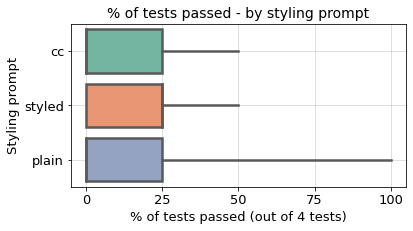

In [218]:
fig, ax = plt.subplots(figsize=(6, 3))
sns.boxplot(data=test_results, x="%_tests_passed", y="style", 
            dodge=False, whis=[0, 100], capprops={"alpha":0}, linewidth=2.5,
            order=["cc", "styled", "plain"], hue_order = ["cc", "styled", "plain"])
ax.set_axisbelow(True)
ax.grid(alpha=0.5)
ax.set_xticks([0, 25, 50, 75, 100])
ax.set_xlabel("% of tests passed (out of 4 tests)")
ax.set_ylabel("Styling prompt")
ax.set_title("% of tests passed - by styling prompt", fontsize=14);

### Differences in passing tests, by different styling prompts and sources:

Due to the very low sample sizes at this level of stratification, these results are extremely unreliable.

In [242]:
test_passed_ver_style = test_results.groupby(["version", "style"]).agg({"num_tests_passed":"mean", "%_tests_passed":"mean", "source":"min"}).reset_index().sort_values("%_tests_passed")

In [237]:
test_results.groupby(["version", "style"]).mean()

test_1    test_2  hidden_test_1  hidden_test_2  \
version  style                                                      
balanced cc      0.000000  0.000000       0.333333       0.666667   
         plain   0.000000  0.000000       0.666667       0.333333   
         styled  0.000000  0.000000       1.000000       1.000000   
bard     cc      0.000000  0.000000       0.000000       0.000000   
         plain   0.000000  0.000000       0.125000       0.000000   
         styled  0.000000  0.000000       0.000000       0.000000   
concise  cc      0.500000  0.000000       0.500000       0.500000   
         plain   0.333333  0.000000       0.333333       0.333333   
         styled  0.000000  0.000000       0.750000       0.250000   
creative cc      0.500000  0.000000       0.000000       0.000000   
         plain   0.166667  0.000000       0.333333       0.333333   
         styled  0.000000  0.000000       1.000000       0.250000   
gpt3.5   cc      0.000000  0.000000       0.000000       0.000000   
         plain   0.100000  0.000000       0.000000       0.200000   
         styled  0.000000  0.000000       0.000000       0.400000   
gpt4     plain   0.470588  0.058824       0.058824       0.470588   

                 num_tests_passed  %_tests_passed  
version  style                                     
balanced cc              1.000000       25.000000  
         plain           1.000000       25.000000  
         styled          2.000000       50.000000  
bard     cc              0.000000        0.000000  
         plain           0.125000        3.125000  
         styled          0.000000        0.000000  
concise  cc              1.500000       37.500000  
         plain           1.000000       25.000000  
         styled          1.000000       25.000000  
creative cc              0.500000       12.500000  
         plain           0.833333       20.833333  
         styled          1.250000       31.250000  
gpt3.5   cc              0.000000        0.000000  
         plain           0.300000        7.500000  
         styled          0.400000       10.000000  
gpt4     plain           1.058824       26.470588

In [245]:
test_results.groupby(["version", "style"]).count()["code"]

version   style 
balanced  cc         3
          plain      3
          styled     1
bard      cc         4
          plain      8
          styled     5
concise   cc         2
          plain      3
          styled     4
creative  cc         2
          plain      6
          styled     4
gpt3.5    cc         4
          plain     10
          styled     5
gpt4      plain     17
Name: code, dtype: int64

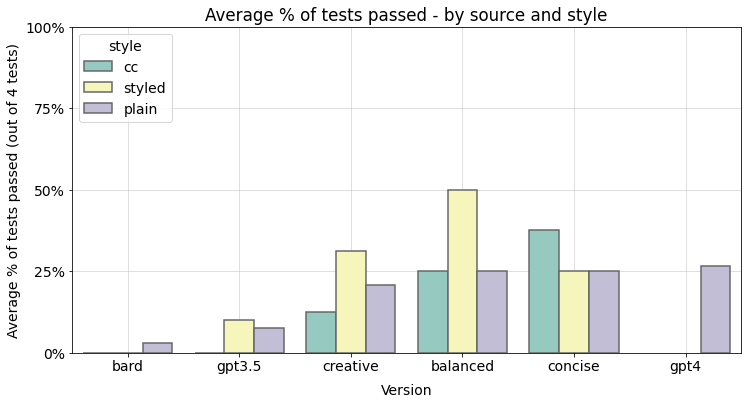

In [233]:
plt.rcParams.update({"font.size": 14})
sns.set_palette("Set3")
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=test_passed_ver_style, x="version", y="%_tests_passed", hue="style",
            zorder=2, linewidth=1.5, edgecolor="0.4", ax=ax)
ax.set_ylabel("Average % of tests passed (out of 4 tests)")
ax.set_xlabel("Version", labelpad=10)
ax.grid(zorder=-1, alpha=0.5)
ax.set_yticks([0, 25, 50, 75, 100])
ax.yaxis.set_major_formatter(StrMethodFormatter(u"{x}%"))
ax.set_title("Average % of tests passed - by source and style");